Name: Tushar Muley

Assignment: Assignment 6-2b

Date:January 9, 2022

##### Assignment 6.2b

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation.

In [1]:
# download data
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator



In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# breakout the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# check the data volume for training
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
# check the data volume for test
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
# preprocess the data
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
# reserve 10K samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
partial_x_train = x_train[:-10000]
partial_y_train = y_train[:-10000]

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(partial_x_train, partial_y_train,
                                     batch_size=32)

validation_generator = train_datagen.flow(x_val, y_val, batch_size=32)

In [11]:
# instantiate the model
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [14]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(partial_x_train) / 32,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=len(x_val) / 32)

C:\Users\Tushar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1250/1250 [==============================] - 60s 47ms/step - loss: 2.2583 - accuracy: 0.1430 - val_loss: 1.9999 - val_accuracy: 0.2568
Epoch 2/30
1250/1250 [==============================] - 62s 50ms/step - loss: 1.9972 - accuracy: 0.2494 - val_loss: 1.8848 - val_accuracy: 0.3030
Epoch 3/30
1250/1250 [==============================] - 62s 49ms/step - loss: 1.9050 - accuracy: 0.2826 - val_loss: 1.8627 - val_accuracy: 0.3095
Epoch 4/30
1250/1250 [==============================] - 62s 49ms/step - loss: 1.8612 - accuracy: 0.3009 - val_loss: 1.8021 - val_accuracy: 0.3351
Epoch 5/30
1250/1250 [==============================] - 62s 49ms/step - loss: 1.8156 - accuracy: 0.3192 - val_loss: 1.7502 - val_accuracy: 0.3557
Epoch 6/30
1250/1250 [==============================] - 62s 49ms/step - loss: 1.7806 - accuracy: 0.3404 - val_loss: 1.7236 - val_accuracy: 0.3691
Epoch 7/30
1250/1250 [==============================] - 62s 49ms/step - loss: 1.7681 - accuracy: 0.3456 - val_loss: 1.6977 -

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

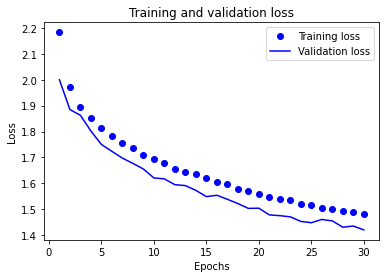

In [17]:
# plot the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

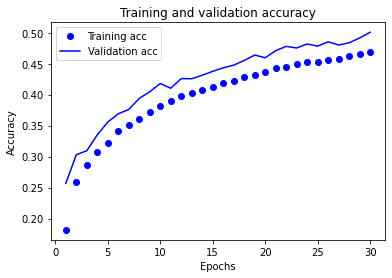

In [18]:
# plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
# retrain the model
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train) / 32,epochs=16)

results = model.evaluate(x_test, y_test)

Epoch 1/16
1562/1562 [==============================] - 61s 38ms/step - loss: 1.4690 - accuracy: 0.4749
Epoch 2/16
1562/1562 [==============================] - 61s 39ms/step - loss: 1.4774 - accuracy: 0.4704
Epoch 3/16
1562/1562 [==============================] - 59s 38ms/step - loss: 1.4617 - accuracy: 0.4783
Epoch 4/16
1562/1562 [==============================] - 59s 38ms/step - loss: 1.4572 - accuracy: 0.4773
Epoch 5/16
1562/1562 [==============================] - 60s 39ms/step - loss: 1.4420 - accuracy: 0.4835
Epoch 6/16
1562/1562 [==============================] - 61s 39ms/step - loss: 1.4284 - accuracy: 0.4907
Epoch 7/16
1562/1562 [==============================] - 62s 40ms/step - loss: 1.4361 - accuracy: 0.4879
Epoch 8/16
1562/1562 [==============================] - 66s 42ms/step - loss: 1.4229 - accuracy: 0.4887
Epoch 9/16
1562/1562 [==============================] - 68s 43ms/step - loss: 1.4268 - accuracy: 0.4926
Epoch 10/16
1562/1562 [==============================] - 63s 40m

In [20]:
# print results
results

[237.89772033691406, 0.3425000011920929]

In [21]:
# generate predictions on new data
model.predict(x_test)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)